In [1]:
#Inline command for Juptyer that allows you to display Matplotlib plots directly in the output cells of your notebook
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import time 

%matplotlib inline



#Style that gives us a default plotting style
plt.style.use('fivethirtyeight')
#This will allow us to see up to 500 columns for a wide Pandas dataframe
pd.set_option('max_columns' , 500)
#Color pallette 
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

#Python wrapper for the Federal Reserve Economic Data (FRED) API
from fredapi import Fred 

#Ask Tate about how to hide this for public use
fred_key = 'ff9d96d41d30095b1ea2b9d5025fa8f4'

In [3]:
#Create the Fred Object
fred = Fred(api_key=fred_key)

#Search for economic data. sp_search set dataframe. Sort by popularity
sp_search = fred.search('S&P' , order_by = 'popularity') 

In [4]:
#Show dataframe. sp_search.shape to see size 
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-09-24   2023-09-24   
CSUSHPINSA          CSUSHPINSA     2023-09-24   2023-09-24   
SP500                    SP500     2023-09-24   2023-09-24   
MEHOINUSA672N    MEHOINUSA672N     2023-09-24   2023-09-24   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-09-24   2023-09-24   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-09-21  Daily, Close   
CSUSHPINSA            1987-01-01      2023-06-01       Monthly   
SP500                 2013-09-23      2023-09-22  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2023-09-21  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2021 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2021 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-09-22 08:19:10-05:00   
CSUSHPINSA                           NSA  2023-08-29 08:11:02-05:00   
SP500                                NSA  2023-09-22 19:10:53-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2023-09-22 08:19:14-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           93  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             89  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

In [5]:
#Pull raw data
sp500 = fred.get_series(series_id = 'SP500')

<AxesSubplot:title={'center':'S&P 500'}>

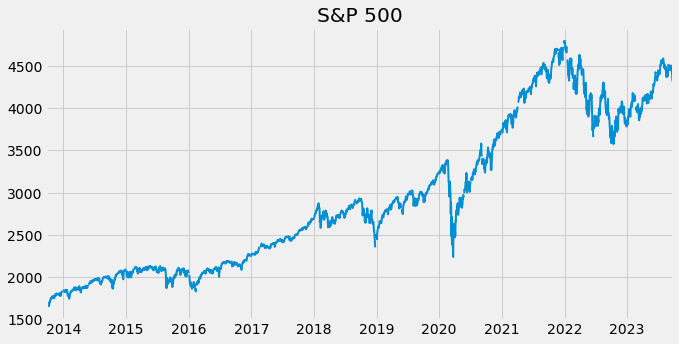

In [6]:
#Viz - Plot series. Change figsize to allow more length. Set Title. Change line width to see better detail on the line
sp500.plot(figsize = (10, 5), title = 'S&P 500', lw=2)

In [7]:
# Pull and Join Multiple Data Series (from Fred)
umep_results = fred.search('unemployment')
# call "UNRATE" dataset 
unrate = fred.get_series('UNRATE')
#unrate.plot()



In [8]:
#umep_results 

In [9]:
# Search for Unemployment state. Filter expects tuple, set freq and monthly 
umemp_df = fred.search('unemployment rate state' , filter = ('frequency' ,'Monthly'))
#query for seasonally adjusted. When column = season_adjustment & and Desc = "Seasonally Adjusted"
unemp_df = umemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
#Apply string filter for title
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2023-09-24   2023-09-24   
LNS14000006            LNS14000006     2023-09-24   2023-09-24   
CAUR                          CAUR     2023-09-24   2023-09-24   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-09-24   2023-09-24   
M0892BUSM156SNBR  M0892BUSM156SNBR     2023-09-24   2023-09-24   
...                            ...            ...          ...   
LNS14200000            LNS14200000     2023-09-24   2023-09-24   
LRUN25TTUSM156S    LRUN25TTUSM156S     2023-09-24   2023-09-24   
CNERUR                      CNERUR     2023-09-24   2023-09-24   
LNS14023569            LNS14023569     2023-09-24   2023-09-24   
LNS14100000            LNS14100000     2023-09-24   2023-09-24   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
M0892AUSM156SNBR                Unemployment Rate for United States   
M0892BUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14200000                     Unemployment Rate Part-Time Workers   
LRUN25TTUSM156S   Unemployment Rate: Aged 25-54: All Persons for...   
CNERUR                 Unemployment Rate in Northeast Census Region   
LNS14023569                        Unemployment Rate - New Entrants   
LNS14100000                     Unemployment Rate Full-Time Workers   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2023-08-01   Monthly               M   
LNS14000006             1972-01-01      2023-08-01   Monthly               M   
CAUR                    1976-01-01      2023-08-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
M0892BUSM156SNBR        1940-01-01      1946-12-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14200000             1968-01-01      2023-08-01   Monthly               M   
LRUN25TTUSM156S         1960-01-01      2023-08-01   Monthly               M   
CNERUR                  1976-01-01      2023-08-01   Monthly               M   
LNS14023569             1967-01-01      2023-08-01   Monthly               M   
LNS14100000             1968-01-01      2023-08-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
M0892BUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14200000       Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S   Percent           %  Seasonally Adjusted   
CNERUR            Percent           %  Seasonally Adjusted   
LNS14023569       Percent           %  Seasonally Adjusted   
LNS14100000       Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2023-09-01 07:45:02-05:00   
LNS14000006                             SA  2023-09-01 07:45:24-05:00   
CAUR                                    SA  2023-09-21 10:08:02-05:00   
M0892AUSM156SNBR                    

In [10]:
#Go through each on of these series and pull data down. Loop throufh each and run get_series 
import time 
%matplotlib inline
%matplotlib notebook

all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.5)
uemp_results = pd.concat(all_results, axis=1)


In [11]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [12]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

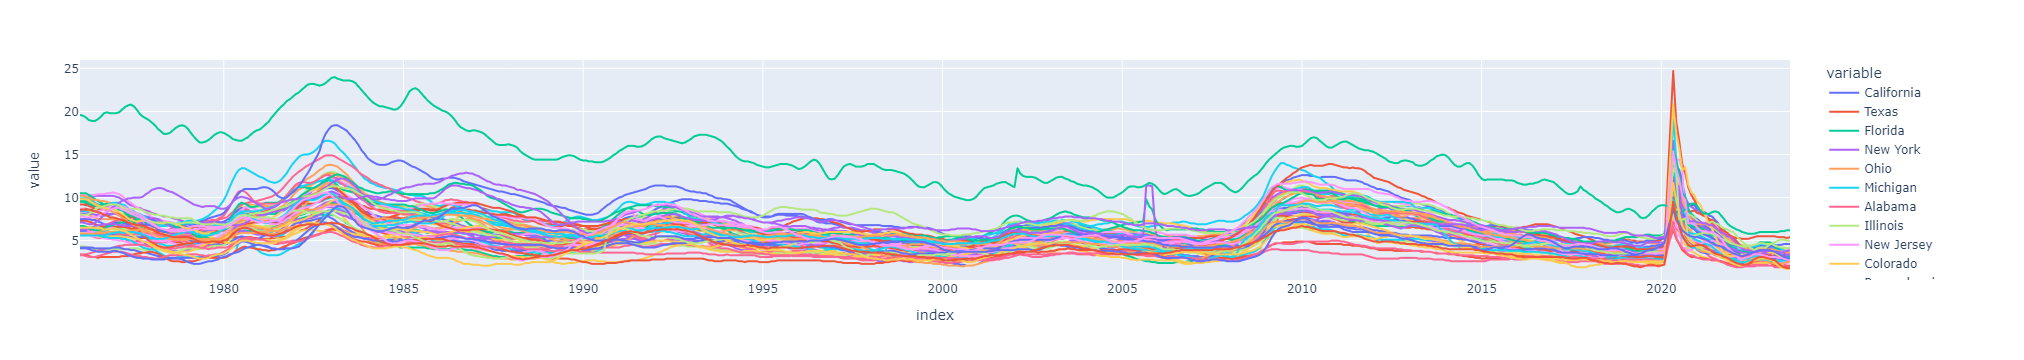

In [13]:
%matplotlib inline
px.line(uemp_states)


In [15]:
uemp_states.loc[uemp_states.index == '2020-04-01'].T


Empty DataFrame
Columns: []
Index: [California, Texas, Florida, New York, Ohio, Michigan, Alabama, Illinois, New Jersey, Colorado, Pennsylvania, New Mexico, Massachusetts, Minnesota, Tennessee, North Carolina, Wisconsin, Maryland, Kentucky, South Carolina, Virginia, Arkansas, Oregon, Georgia, Arizona, Washington, Indiana, Iowa, Missouri, Utah, West Virginia, Nevada, Mississippi, Louisiana, Connecticut, Oklahoma, North Dakota, the District of Columbia, Maine, Hawaii, Kansas, Nebraska, Puerto Rico, Alaska, Montana, Idaho, South Dakota, Delaware, Rhode Island, New Hampshire, Wyoming, Vermont]

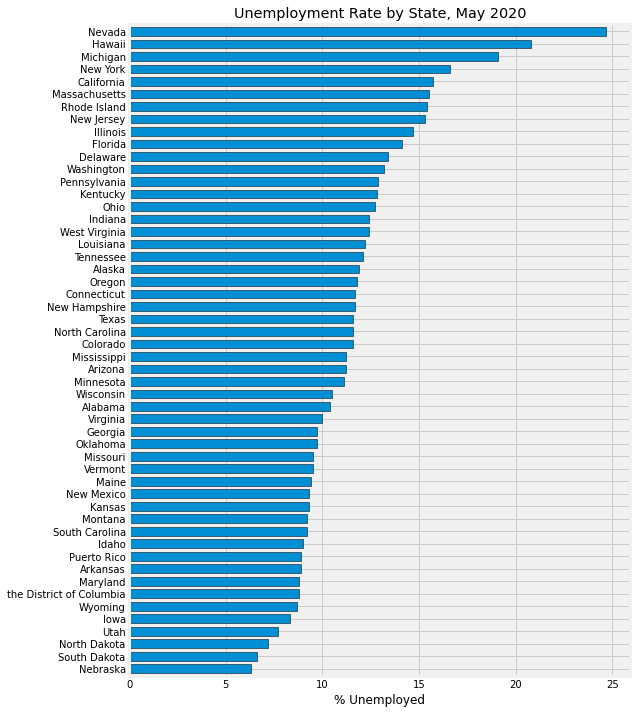

In [16]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind = 'barh', figsize=(8, 12), width=0.7, edgecolor='black', 
        title= 'Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [17]:
#Pull Participation Rate 

In [18]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df.shape


(109, 15)

In [19]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [20]:
#Plot Unemployment vs Participation

In [21]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

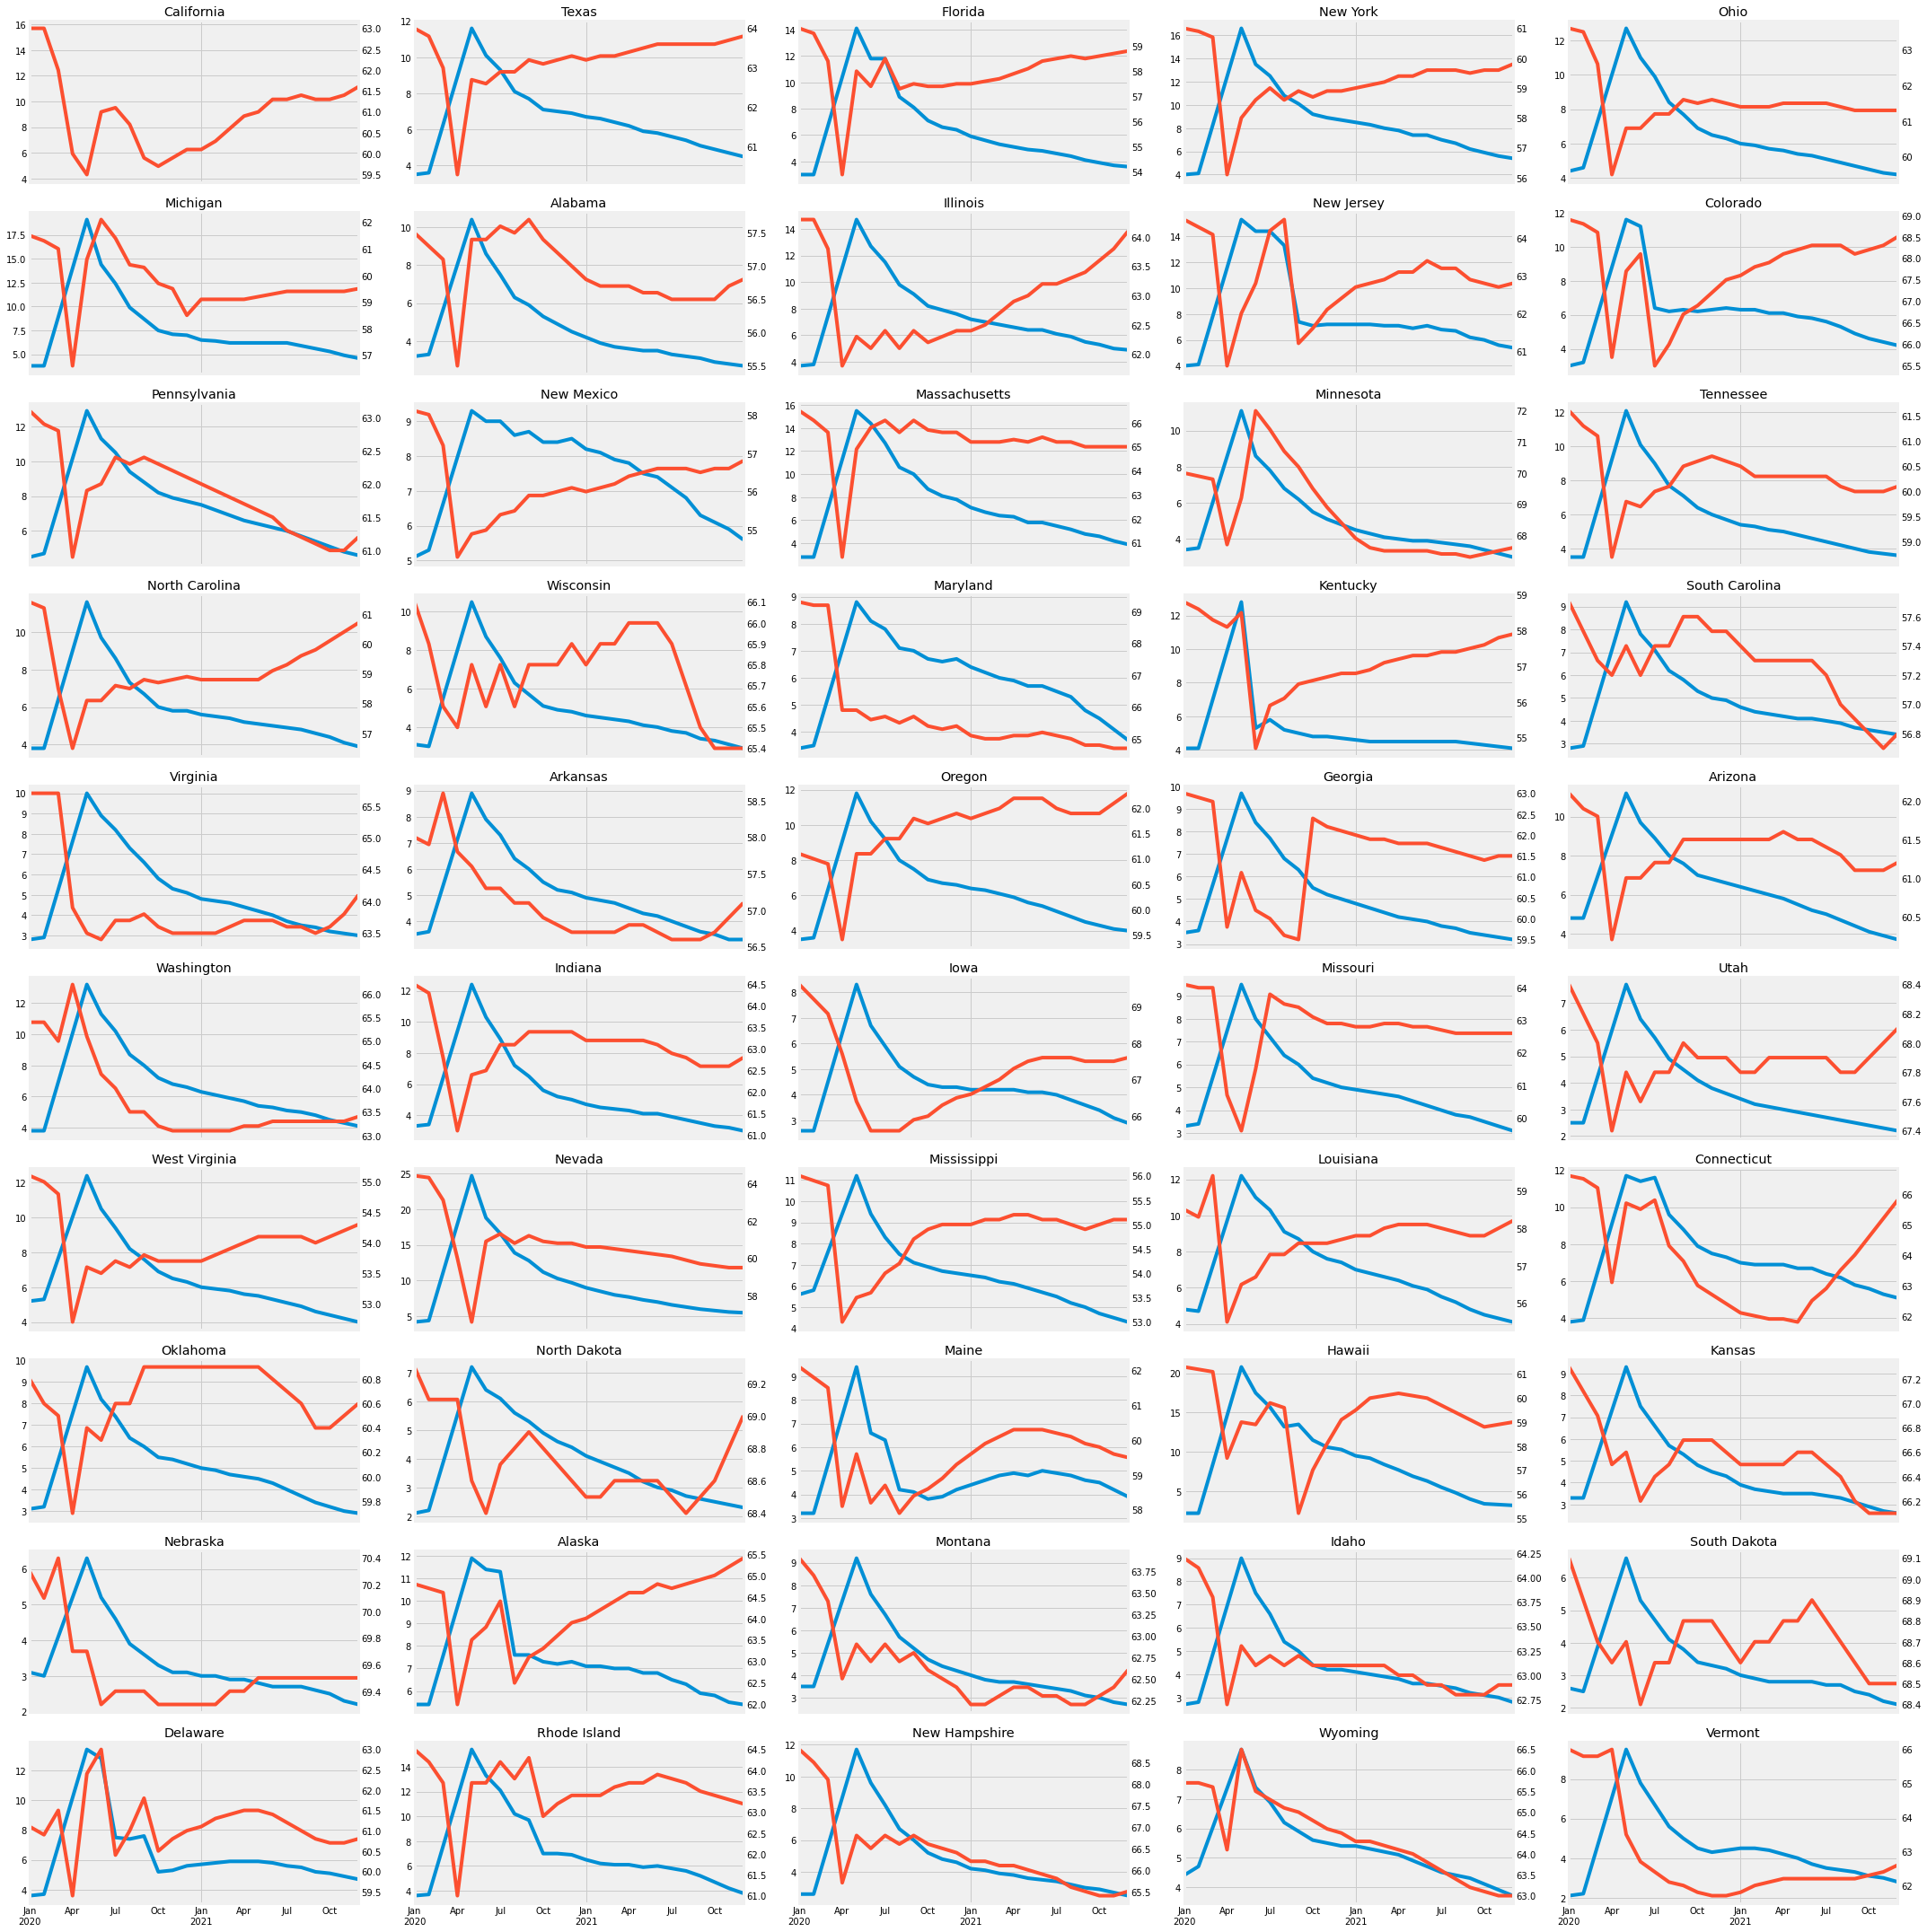

In [22]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

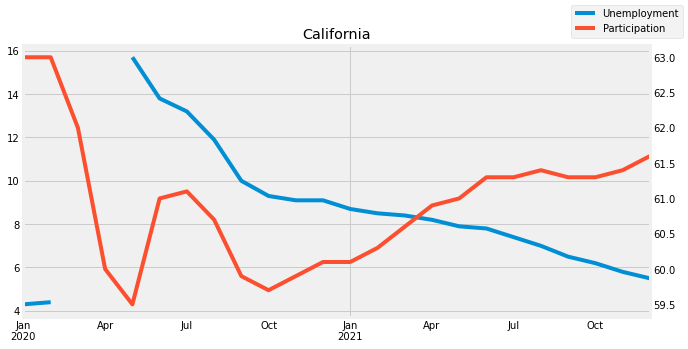

In [23]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()
